# 数据可视化

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

## 读取数据,数据预处理

In [3]:
df1 = pd.read_csv(".\\data\\train_u6lujuX_CVtuZ9i.csv")
df1 = df1.drop("Loan_ID", axis=1)

df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)
df1['Married'].fillna(df1['Married'].mode()[0], inplace=True)
df1['Dependents'].fillna(df1['Dependents'].mode()[0], inplace=True)
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0], inplace=True)
df1['LoanAmount'].fillna(df1['LoanAmount'].mean(), inplace=True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0], inplace=True)
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0], inplace=True)

## 一.单变量分析

### 分类特征

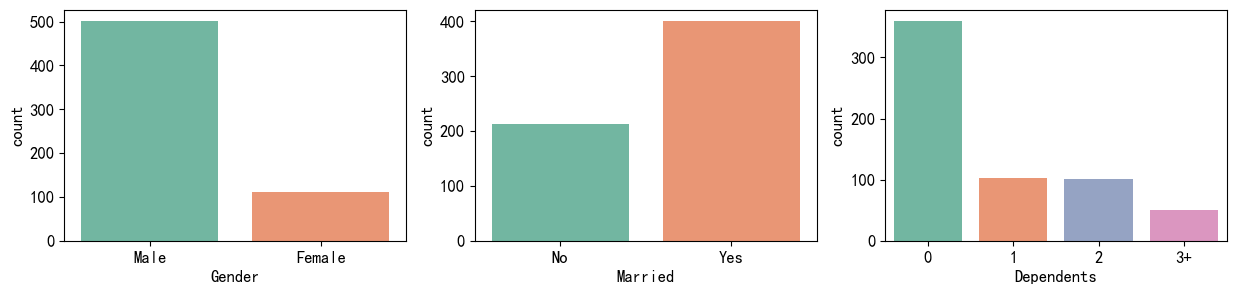

In [4]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', palette='Set2', data = df1)
plt.subplot(1, 3, 2)
sns.countplot(x='Married', palette='Set2', data = df1)
plt.subplot(1, 3, 3)
sns.countplot(x='Dependents', palette='Set2', data = df1)
plt.show()

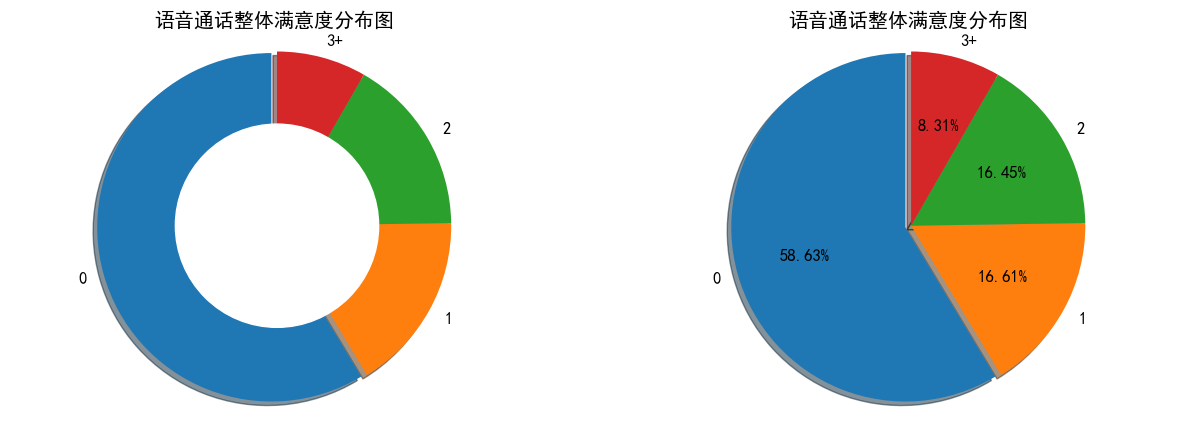

In [16]:
def pie_paint1(df, label):

    x = np.array(df[label].value_counts().reset_index())
    # 这个要改成类别对应的数字
    explode = (0.04, 0, 0, 0)
    plt.axis('equal') 
    plt.pie(x[:, 1], labels=x[:, 0], explode=explode, shadow=True, startangle=90,radius=1.2)
    my_circle = plt.Circle((0,0), 0.7, color='white')
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title("语音通话整体满意度分布图")
    plt.axis('equal')

def pie_paint2(df, label):

    x = np.array(df[label].value_counts().reset_index())
    # 这个要改成类别对应的数字
    explode = (0.04, 0, 0, 0)
    plt.axis('equal') 
    plt.pie(x[:, 1], labels=x[:, 0], autopct="%1.2f%%", explode=explode, shadow=True, startangle=90,radius=1.2)
    my_circle = plt.Circle((0,0), 0.7, color='white')
    plt.title("语音通话整体满意度分布图")
    plt.axis('equal')


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
pie_paint1(df1, "Dependents")
plt.subplot(1, 2, 2)
pie_paint2(df1, "Dependents")
plt.show()

### 数值特征

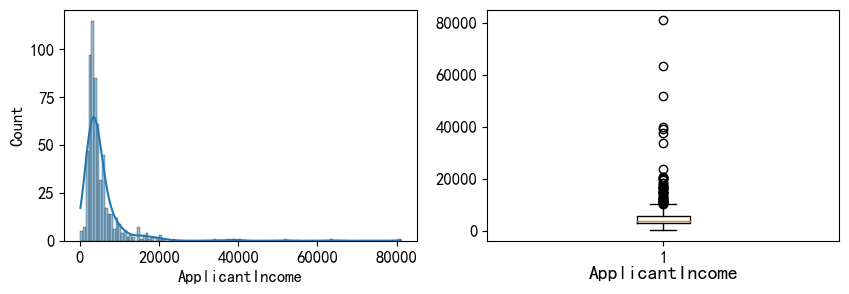

In [6]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.histplot(df1['ApplicantIncome'], kde=True)
plt.subplot(1, 2, 2)
plt.boxplot(df1['ApplicantIncome'])
plt.title('ApplicantIncome', x=0.5,y=-0.2)

plt.show()

## 双变量分析

### 分类-分类

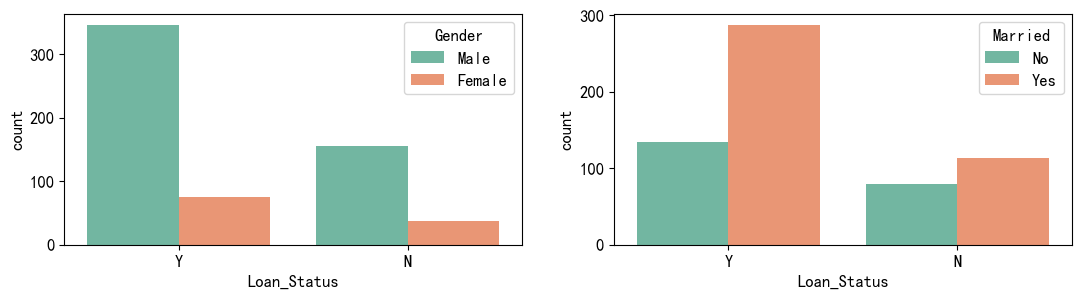

In [7]:
plt.figure(figsize=(13, 3))

plt.subplot(121)
sns.countplot(x='Loan_Status', hue='Gender', palette='Set2', data = df1)
plt.subplot(122)
sns.countplot(x='Loan_Status', hue='Married', palette='Set2', data = df1)

plt.show()

### 数值-分类

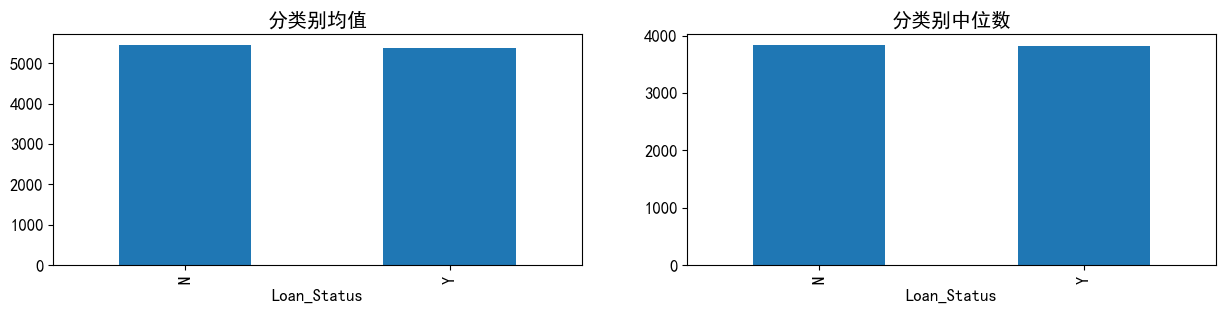

In [8]:
plt.figure(figsize=(15, 3))
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

plt.subplot(1, 2, 1)
df1.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.title("分类别均值")
plt.subplot(1, 2, 2)
df1.groupby('Loan_Status')['ApplicantIncome'].median().plot.bar()
plt.title("分类别中位数")
plt.show()

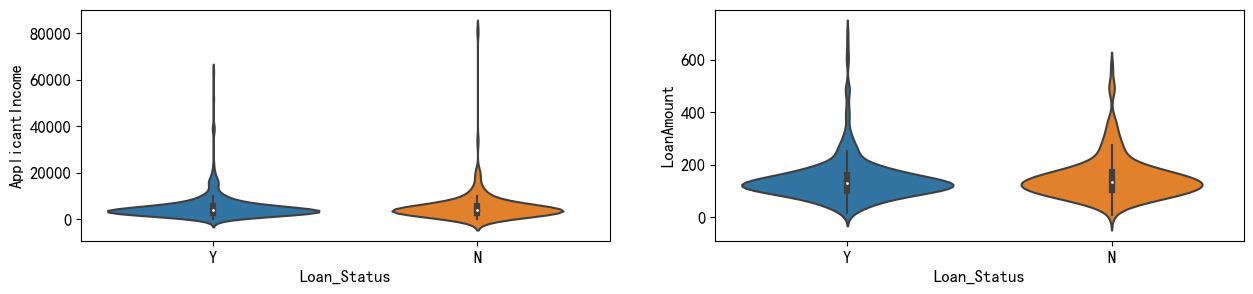

In [9]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
sns.violinplot(x="Loan_Status", y="ApplicantIncome", data=df1)
plt.subplot(1, 2, 2)
sns.violinplot(x="Loan_Status", y="LoanAmount", data=df1)
plt.show()

### 数值-数值

<Figure size 600x100 with 0 Axes>

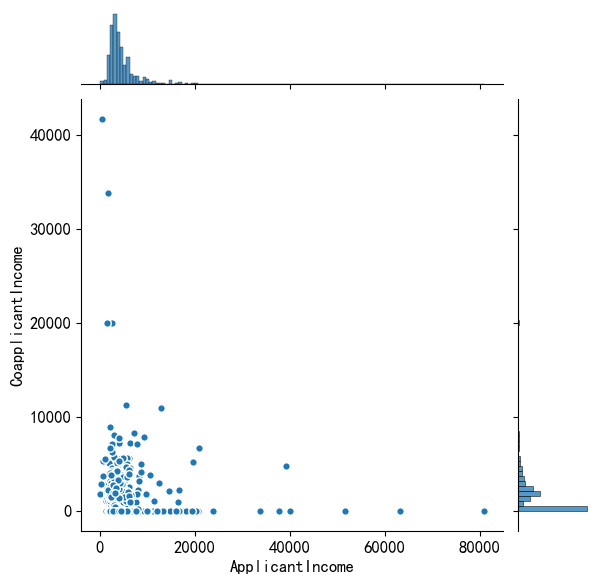

In [10]:
plt.figure(figsize=(6, 1))
sns.jointplot(x='ApplicantIncome', y='CoapplicantIncome', s=30, edgecolor='w', linewidth=1, data=df1)
plt.show()

## 三.相关性分析

C:\Users\Jack\AppData\Local\Temp\ipykernel_10920\2604900593.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df1.corr("pearson")


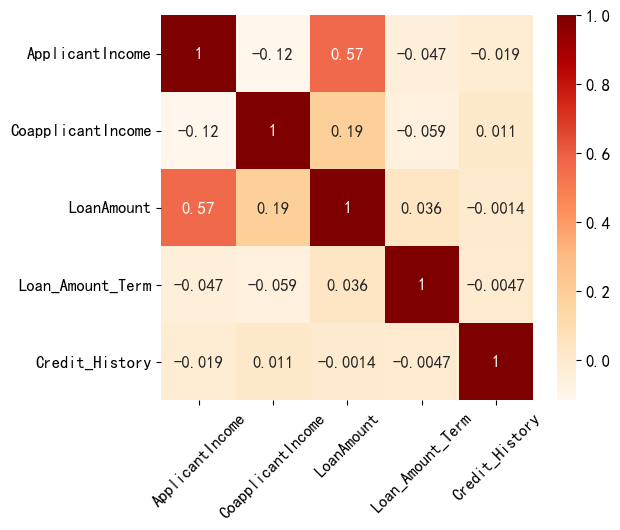

In [11]:
# 三种相关系数算法
# pearson,spearman,kendall
correlation = df1.corr("pearson")

plt.figure(figsize = (6, 5))
sns.heatmap(correlation, annot=True, cmap="OrRd")
plt.xticks(rotation = 45)
plt.show()

### 四.条形统计图

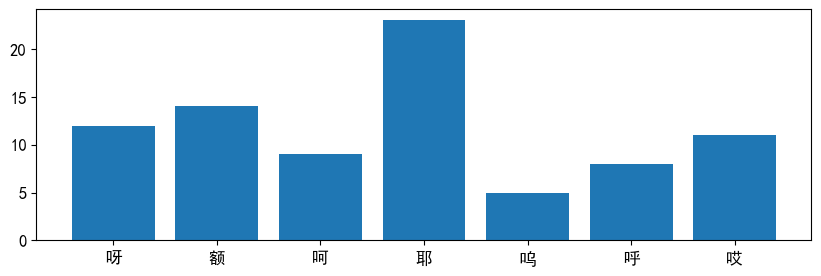

In [12]:
plt.figure(figsize=(10, 3))
x = ["呀", "额", "呵", "耶", "呜", "呼", "哎"]
y = [12, 14, 9, 23, 5, 8, 11]
plt.bar(x, y,align='center')
plt.show()

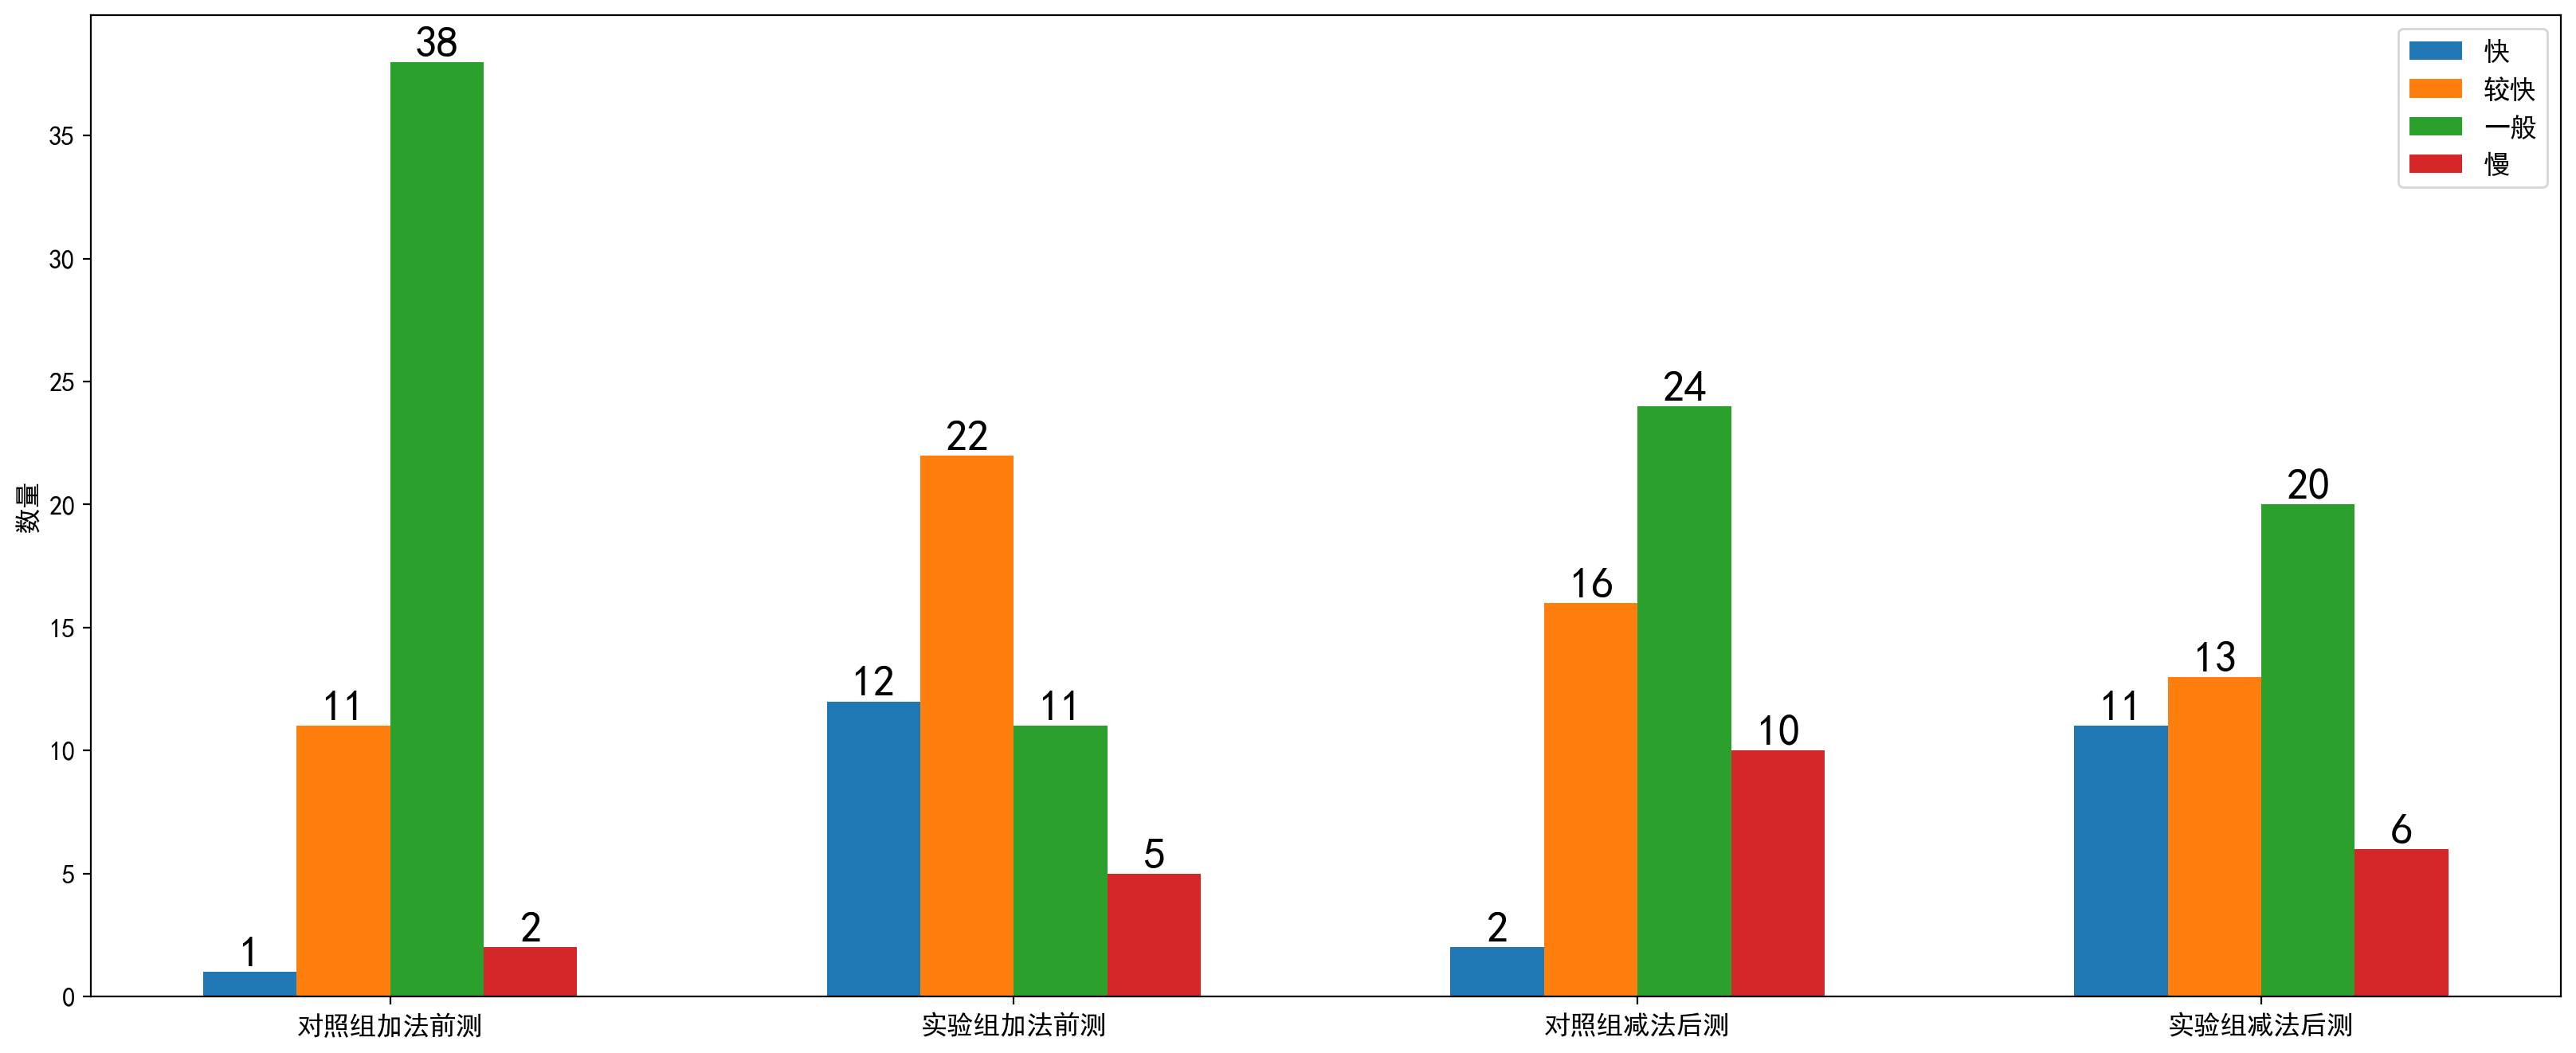

In [13]:
a = ["对照组加法前测", "实验组加法前测", "对照组减法后测", "实验组减法后测"]

b_1 = [1, 12, 2, 11]
b_2 = [11, 22, 16, 13]
b_3 = [38, 11, 24, 20]
b_4 = [2, 5, 10, 6]

width_bar=0.15

x_1=list(range(len(a)))

#这里的目的是把条形图间隔开来，防止重叠，都加上width_bar的倍数
x_2=[i+width_bar for i in x_1]
x_3=[i+width_bar*2 for i in x_1]
x_4=[i+width_bar*3 for i in x_1]

#设置图片大小和分辨率，其中figure单位为英寸，dpi为分辨率
plt.figure(figsize=(20,8), dpi=200)

#设置X轴的刻度和字符串，步长为1
plt.xticks([i+width_bar*1.5 for i in x_1], a)

#plt.bar()用于画条形图
c_1=plt.bar(range(len(a)),b_1,width=width_bar,label="快")
c_2=plt.bar(x_2,b_2,width=width_bar,label="较快")
c_3=plt.bar(x_3,b_3,width=width_bar,label="一般")
c_4=plt.bar(x_4,b_4,width=width_bar,label="慢")

#用于设置数字标注
for k in c_1:
    height=k.get_height()
    plt.text(k.get_x() + k.get_width() / 2, height, str(height),fontsize=20, ha="center", va="bottom")
    
for k in c_2:
    height=k.get_height()
    plt.text(k.get_x() + k.get_width() / 2, height, str(height),fontsize=20, ha="center", va="bottom")

for k in c_3:
    height=k.get_height()
    plt.text(k.get_x() + k.get_width() / 2, height, str(height),fontsize=20, ha="center", va="bottom")
    
for k in c_4:
    height=k.get_height()
    plt.text(k.get_x() + k.get_width() / 2, height, str(height),fontsize=20, ha="center", va="bottom")
    
plt.ylabel("数量")
    
plt.legend()
plt.show()

## 五.全局散点图（分类不同颜色）

<Figure size 2000x2000 with 0 Axes>

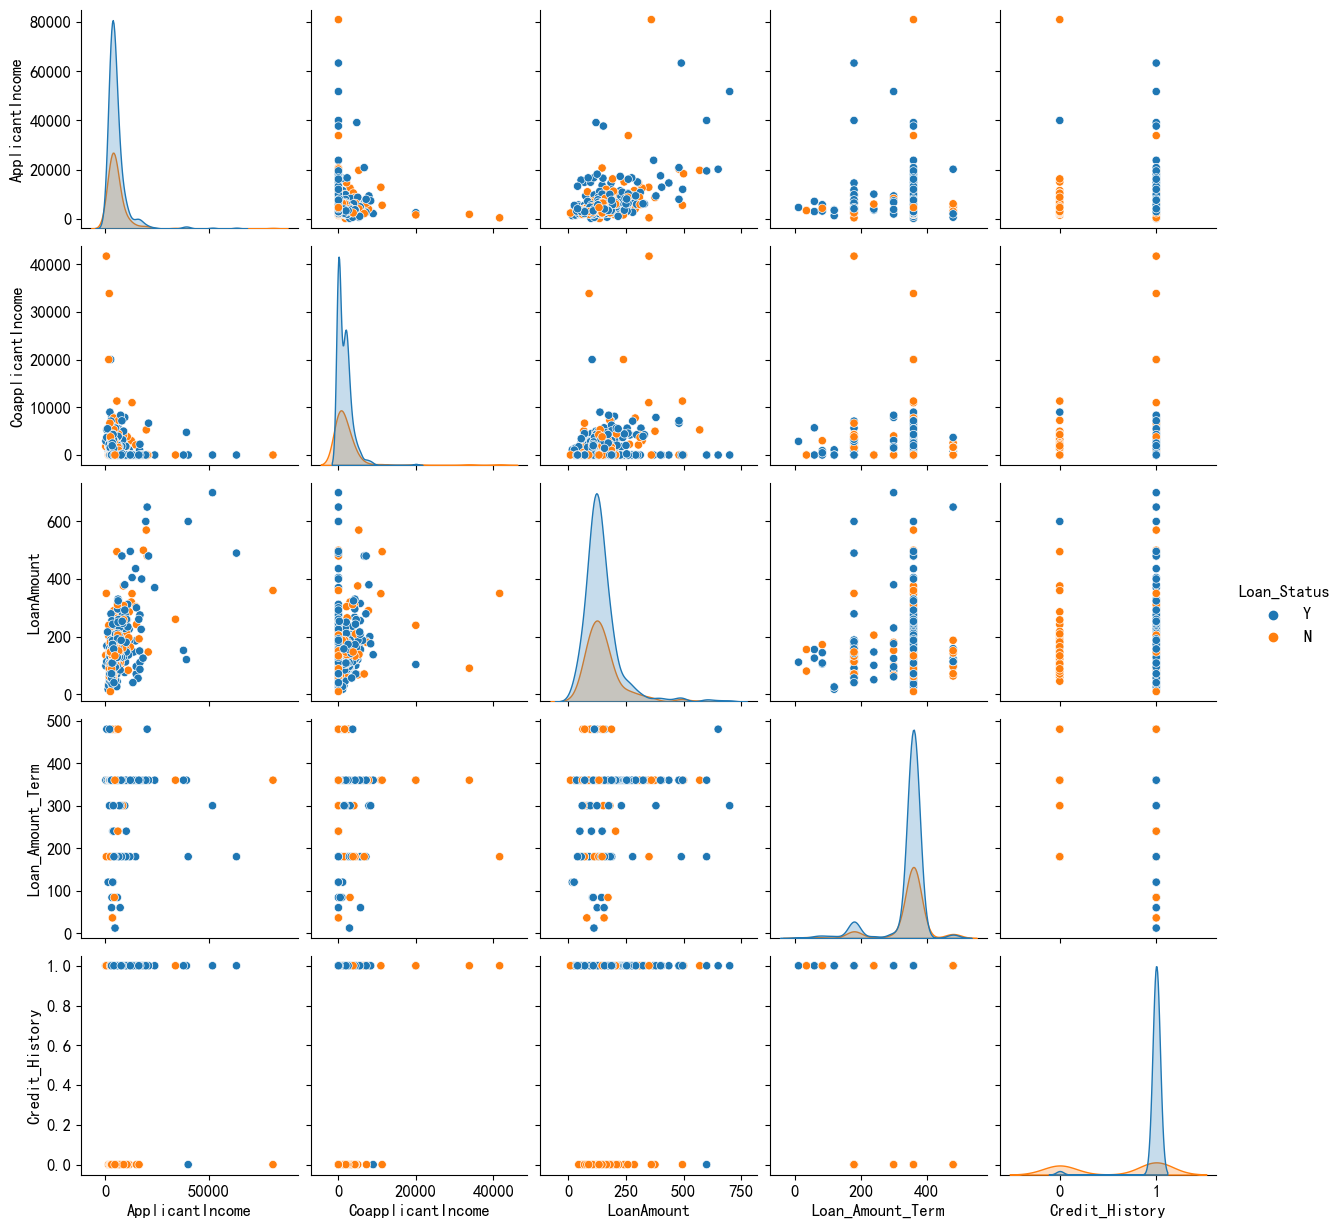

In [14]:
plt.figure(figsize=(20, 20))
sns.pairplot(df1, hue='Loan_Status')
plt.show()